In [1]:
!pip install pyforest

In [2]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
from pyforest import*

In [3]:
df =pd.read_csv('ipl.csv')
df.head(3)

<IPython.core.display.Javascript object>

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222


In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.shape

(76014, 15)

In [6]:
df.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [7]:
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
#REMOVING UNNECESSARY COLUMNS
cols = ['mid','venue','batsman','bowler','striker','non-striker']
df.drop(labels = cols, axis=1, inplace =True)

In [9]:
df.shape

(76014, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            76014 non-null  object 
 1   bat_team        76014 non-null  object 
 2   bowl_team       76014 non-null  object 
 3   runs            76014 non-null  int64  
 4   wickets         76014 non-null  int64  
 5   overs           76014 non-null  float64
 6   runs_last_5     76014 non-null  int64  
 7   wickets_last_5  76014 non-null  int64  
 8   total           76014 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 5.2+ MB


In [11]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
#Lets Keep consistent teams only
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [13]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [14]:
# Removing the first 5 overs data in every match: there should be at least 5 over scores
df = df[df['overs']>=5.0] 

In [15]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [16]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [17]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [18]:
#Encoding categorical features using get dunnies
encod_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

<IPython.core.display.Javascript object>

In [19]:
encod_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
encod_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [21]:
#Rearrange the columns
encod_df = encod_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [22]:
encod_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [23]:
# Splitting the data into train and test set
X_train = encod_df.drop(labels='total', axis=1)[encod_df['date'].dt.year <= 2016]
X_test = encod_df.drop(labels='total', axis=1)[encod_df['date'].dt.year >= 2017]

In [24]:
X_test

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
68894,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.1,46,1,42,1
68895,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.2,50,1,46,1
68896,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.3,50,1,44,1
68897,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.4,54,1,48,1
68898,2017-04-05,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,5.5,58,1,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,18.1,106,9,29,4
75885,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,18.2,107,9,29,4
75886,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,18.3,107,9,28,4
75887,2017-05-19,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,18.4,107,9,24,4


In [25]:
X_train

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,59,1
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,59,1
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.2,194,7,54,4
68858,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.3,200,7,56,4
68859,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.4,201,7,56,4
68860,2016-05-29,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.5,202,7,57,4


In [26]:
y_train = encod_df[encod_df['date'].dt.year <= 2016]['total'].values
y_test = encod_df[encod_df['date'].dt.year >= 2017]['total'].values

In [27]:
y_train

array([222, 222, 222, ..., 208, 208, 208], dtype=int64)

In [28]:
y_test

array([207, 207, 207, ..., 107, 107, 107], dtype=int64)

In [29]:
encod_df[encod_df['date'].dt.year <= 2016]['total'].values

array([222, 222, 222, ..., 208, 208, 208], dtype=int64)

In [30]:
#Removing the date column
X_train.drop(labels='date', axis = True, inplace = True)
X_test.drop(labels='date', axis = True, inplace = True)

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#making predictions on the test set
y_pred = regressor.predict(X_test)

In [36]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [37]:
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))

Mean Squared Error: 251.01
Mean Absolute Error: 12.12


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

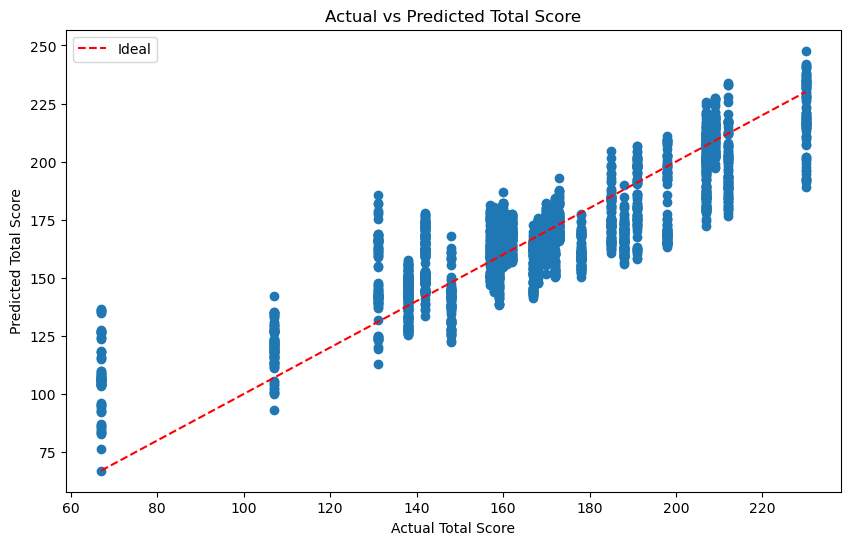

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label ='Ideal')
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs Predicted Total Score")
plt.legend()
plt.show()

In [39]:
filename = 'lr-model.pkl'
pickle.dump(regressor, open(filename,'wb'))

<IPython.core.display.Javascript object>